In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gc 
import warnings
import plotly.express as px
import matplotlib.animation as ani
warnings.filterwarnings("ignore")

In [3]:
path = r"C:\Users\Suyash Singh\Desktop\Covid-19 Data Analysis\data\time_series_covid_19_confirmed.csv"

df = pd.read_csv(path)

df.info()

df.head()

"Loading the csv files to use for Exploratory Data Analysis"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Columns: 498 entries, Province/State to 5/29/21
dtypes: float64(2), int64(494), object(2)
memory usage: 1.0+ MB


'Loading the csv files to use for Exploratory Data Analysis'

In [4]:
df.drop(['Province/State',"Lat", "Long"], axis=1, inplace = True)
df

"""Cleaning the data for further use. Removing Superflous Columns
    Province/State: Not all countries will have a data on province therefore it should be removed
    Lat/Long: Both data will not *help* anything in Covid Analysis."""

'Cleaning the data for further use. Removing Superflous Columns\n    Province/State: Not all countries will have a data on province therefore it should be removed\n    Lat/Long: Both data will not *help* anything in Covid Analysis.'

In [5]:
world_confirmed_cases = df.drop(df.columns.to_series()["1/22/20":"5/28/21"], axis=1)

world_confirmed_cases.rename({'5/29/21': 'Total Confirmed Cases', "Country/Region": 'Country'}, axis=1, inplace = True)
"""Renaming the columns for better readability"""

world_confirmed_cases = world_confirmed_cases.groupby("Country")['Total Confirmed Cases'].sum().reset_index()
"""Due to Multiple Instances of the same country in provinces. Adding the total no. of data of a given country"""

world_confirmed_cases

,Country,Total Confirmed Cases
0,Afghanistan,70111
1,Albania,132297
2,Algeria,128456
3,Andorra,13693
4,Angola,34180
...,...,...
188,Vietnam,6908
189,West Bank and Gaza,307838
190,Yemen,6731
191,Zambia,94751


In [6]:
top_10_confirmed = world_confirmed_cases.sort_values(by=['Total Confirmed Cases'], ascending=False).head(10)
"""Getting the top 10 Countries with Confirmed Cases"""
top_10_confirmed

,Country,Total Confirmed Cases
179,US,33251939
79,India,27894800
23,Brazil,16471600
62,France,5719877
178,Turkey,5235978
143,Russia,4995613
183,United Kingdom,4496823
85,Italy,4213055
6,Argentina,3732263
66,Germany,3684672


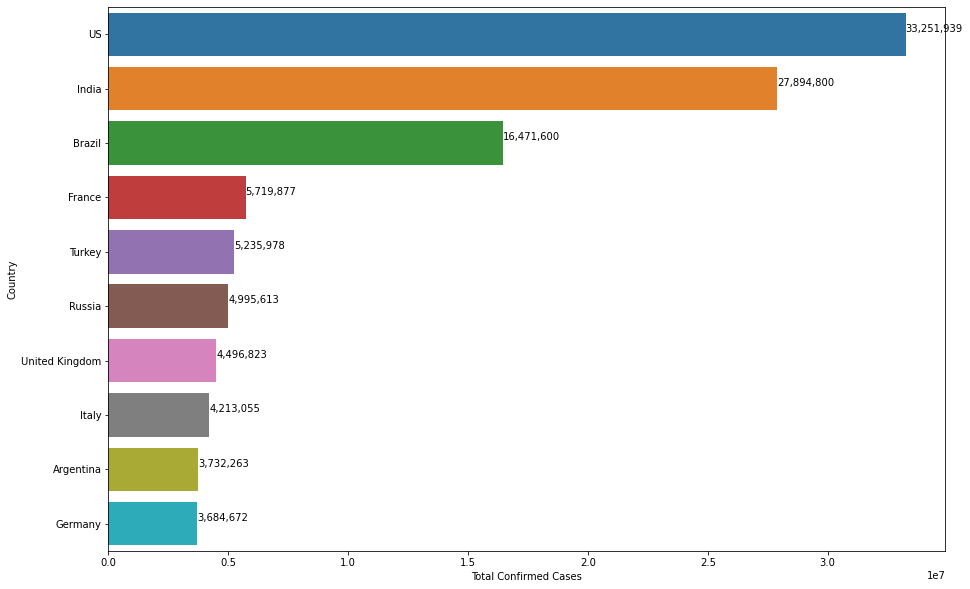

In [7]:
plt.figure(figsize=(15,10))

"""Generating a Barplot using Seaborn"""
plot = sns.barplot(top_10_confirmed['Total Confirmed Cases'], top_10_confirmed['Country'])

for i,(value,name) in enumerate(zip(top_10_confirmed['Total Confirmed Cases'],top_10_confirmed['Country'])):
    plot.text(value,i-0.05,f'{value:,.0f}',size=10)
    
plt.show()

In [8]:
path = r"C:\Users\Suyash Singh\Desktop\Covid-19 Data Analysis\data\time_series_covid_19_deaths.csv"

df = pd.read_csv(path)

df.info()

df.head()

"Loading the csv files to use for Exploratory Data Analysis"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Columns: 498 entries, Province/State to 5/29/21
dtypes: float64(2), int64(494), object(2)
memory usage: 1.0+ MB


'Loading the csv files to use for Exploratory Data Analysis'

In [9]:
df.drop(['Province/State',"Lat", "Long"], axis=1, inplace = True)
df

"""Cleaning the data for further use. Removing Superflous Columns
    Province/State: Not all countries will have a data on province therefore it should be removed
    Lat/Long: Both data will not *help* anything in Covid Analysis."""

'Cleaning the data for further use. Removing Superflous Columns\n    Province/State: Not all countries will have a data on province therefore it should be removed\n    Lat/Long: Both data will not *help* anything in Covid Analysis.'

In [10]:
world_deaths = df.drop(df.columns.to_series()["1/22/20":"5/28/21"], axis=1)

world_deaths.rename({'5/29/21': 'Total Deaths', "Country/Region": 'Country'}, axis=1, inplace = True)
"""Renaming the columns for better readability"""


world_deaths = world_deaths.groupby("Country")['Total Deaths'].sum().reset_index()
"""Due to Multiple Instances of the same country in provinces. Adding the total no. of data of a given country"""

world_deaths

,Country,Total Deaths
0,Afghanistan,2899
1,Albania,2449
2,Algeria,3460
3,Andorra,127
4,Angola,757
...,...,...
188,Vietnam,47
189,West Bank and Gaza,3492
190,Yemen,1319
191,Zambia,1276


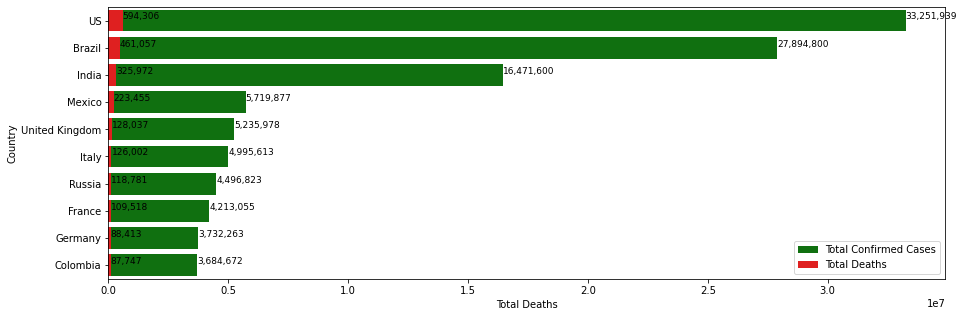

In [23]:
"""Using Seaborn Library to plot the barplots of confirmed cases with deaths."""

top_10_confirmed = world_confirmed_cases.sort_values(by=['Total Confirmed Cases'], ascending=False).head(10)
top_10_deaths = world_deaths.sort_values(by=['Total Deaths'], ascending=False).head(10)

### Generate a Barplot

plt.figure(figsize=(15,5))

confirmed = sns.barplot(top_10_confirmed['Total Confirmed Cases'], top_10_confirmed['Country'], color = 'green', label='Total Confirmed Cases')
deaths = sns.barplot(top_10_deaths['Total Deaths'], top_10_deaths['Country'], color = 'red', label='Total Deaths')

### Add Texts for Barplots
for i,(value,name) in enumerate(zip(top_10_confirmed['Total Confirmed Cases'],top_10_confirmed['Country'])):
    confirmed.text(value,i-0.05,f'{value:,.0f}',size=9)
    
for i,(value,name) in enumerate(zip(top_10_deaths['Total Deaths'],top_10_deaths['Country'])):
    deaths.text(value,i-0.05,f'{value:,.0f}',size=9)
    
plt.legend(loc=4)
plt.show()

In [12]:
path = r"C:\Users\Suyash Singh\Desktop\Covid-19 Data Analysis\data\time_series_covid_19_recovered.csv"

df = pd.read_csv(path)

df.info()

df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Columns: 498 entries, Province/State to 5/29/21
dtypes: float64(2), int64(494), object(2)
memory usage: 1015.6+ KB


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,55687,55790,55889,56035,56295,56518,56711,56962,57119,57281
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,127869,128425,128601,128732,128826,128907,128978,129042,129097,129215
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,87902,88066,88208,88346,88497,88672,88861,89040,89232,89419
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,13234,13234,13234,13234,13234,13263,13381,13405,13416,13416
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,26483,26513,26775,26778,27087,27204,27467,27529,27577,27646


In [13]:
df.drop(['Province/State',"Lat", "Long"], axis=1, inplace = True)
df

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,55687,55790,55889,56035,56295,56518,56711,56962,57119,57281
1,Albania,0,0,0,0,0,0,0,0,0,...,127869,128425,128601,128732,128826,128907,128978,129042,129097,129215
2,Algeria,0,0,0,0,0,0,0,0,0,...,87902,88066,88208,88346,88497,88672,88861,89040,89232,89419
3,Andorra,0,0,0,0,0,0,0,0,0,...,13234,13234,13234,13234,13234,13263,13381,13405,13416,13416
4,Angola,0,0,0,0,0,0,0,0,0,...,26483,26513,26775,26778,27087,27204,27467,27529,27577,27646
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256,Vietnam,0,0,0,0,0,0,0,0,0,...,2687,2689,2721,2721,2794,2794,2853,2853,2896,2896
257,West Bank and Gaza,0,0,0,0,0,0,0,0,0,...,295643,296901,297201,297201,298502,299024,299559,299559,300125,300524
258,Yemen,0,0,0,0,0,0,0,0,0,...,3159,3179,3201,3245,3260,3273,3306,3339,3375,3399
259,Zambia,0,0,0,0,0,0,0,0,0,...,90955,91019,91102,91156,91200,91221,91239,91321,91443,91594


In [28]:
world_recovered = df.drop(df.columns.to_series()["1/22/20":"5/28/21"], axis=1)

world_recovered.rename({'5/29/21': 'Total Recovered', "Country/Region": 'Country'}, axis=1, inplace = True)

world_recovered = world_recovered.groupby("Country")['Total Recovered'].sum().reset_index()

world_recovered

,Country,Total Recovered
0,Afghanistan,57281
1,Albania,129215
2,Algeria,89419
3,Andorra,13416
4,Angola,27646
5,Antigua and Barbuda,1206
6,Argentina,3288467
7,Armenia,212752
8,Australia,23579
9,Austria,627672


In [15]:
top_10_recovered = world_recovered.sort_values(by=['Total Recovered'], ascending=False).head(10)
top_10_recovered

,Country,Total Recovered
79,India,25454320
23,Brazil,14496224
178,Turkey,5094279
143,Russia,4616422
85,Italy,3845087
66,Germany,3479700
6,Argentina,3288467
37,Colombia,3141549
139,Poland,2636675
81,Iran,2425033


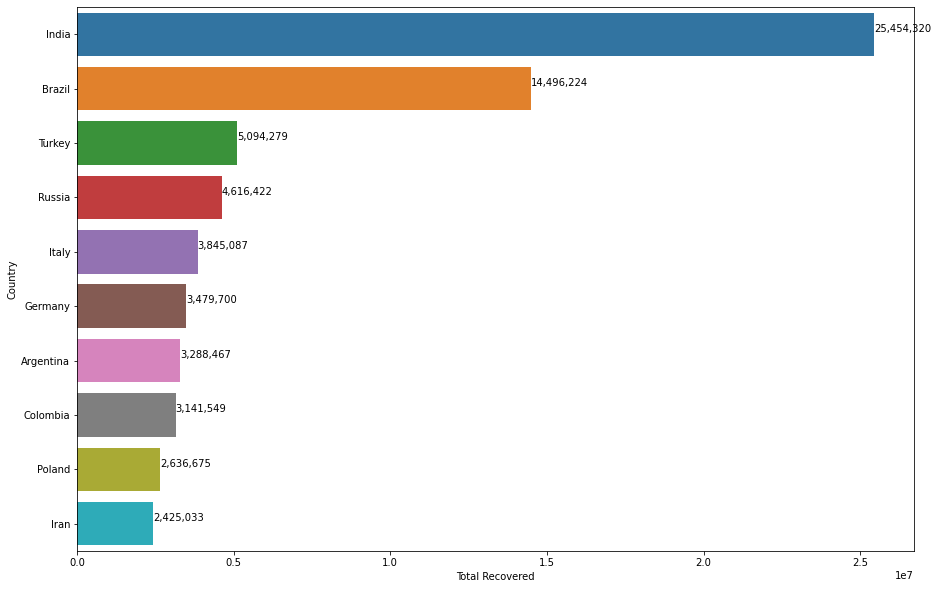

'Plotting the Top 10 countries with total recovered cases'

In [16]:
plt.figure(figsize=(15,10))

plot = sns.barplot(top_10_recovered['Total Recovered'], top_10_recovered['Country'])

for i,(value,name) in enumerate(zip(top_10_recovered['Total Recovered'],top_10_recovered['Country'])):
    plot.text(value,i-0.05,f'{value:,.0f}',size=10)
    
plt.show()

"""Plotting the Top 10 countries with total recovered cases"""

In [17]:
world_recovered.drop(['Country'], axis = 1, inplace = True)
world_recovered

,Total Recovered
0,57281
1,129215
2,89419
3,13416
4,27646
...,...
188,2896
189,300524
190,3399
191,91594


In [27]:
world_recovery_rate = pd.concat([world_confirmed_cases, world_recovered], axis=1)
"""Recovery Rate = Total Number of Confirmed Cases/ Total Number of Recovered Cases"""
world_recovery_rate

,Country,Total Confirmed Cases,Total Recovered
0,Afghanistan,70111,57281
1,Albania,132297,129215
2,Algeria,128456,89419
3,Andorra,13693,13416
4,Angola,34180,27646
5,Antigua and Barbuda,1259,1206
6,Argentina,3732263,3288467
7,Armenia,222555,212752
8,Australia,30096,23579
9,Austria,644207,627672


In [20]:
world_recovery_rate["Recovery Rate"] = (world_recovery_rate["Total Recovered"]/world_recovery_rate["Total Confirmed Cases"])
"""Used this command to see the all the rows and see if the sum of the recovered data came out correct"""
print(world_recovery_rate)

                              Country  Total Confirmed Cases  Total Recovered  \
0                         Afghanistan                  70111            57281   
1                             Albania                 132297           129215   
2                             Algeria                 128456            89419   
3                             Andorra                  13693            13416   
4                              Angola                  34180            27646   
5                 Antigua and Barbuda                   1259             1206   
6                           Argentina                3732263          3288467   
7                             Armenia                 222555           212752   
8                           Australia                  30096            23579   
9                             Austria                 644207           627672   
10                         Azerbaijan                 333723           323617   
11                          

In [21]:
world_recovery_rate.replace([np.inf, -np.inf], np.nan, inplace=True)
world_recovery_rate.dropna(subset = ["Recovery Rate"], inplace=True)
world_recovery_rate

"""Cleaning up the data by removing the NaN and inf Values"""

'Cleaning up the data by removing the NaN and inf Values'

In [26]:
# Chloreth Map

"""A choropleth map is a type of thematic map in which areas are shaded or patterned in proportion to a statistical variable that represents an aggregate summary of a geographic characteristic within each area, such as population density or per-capita income.
Choropleth maps provide an easy way to visualize how a measurement varies across a geographic area or show the level of variability within a region"""

figure = px.choropleth(world_recovery_rate,locations='Country', locationmode='country names', color='Recovery Rate', hover_name='Country', color_continuous_scale='tealgrn', range_color=[0.8,1],title='Countries with their Recovery Rate')

figure.show()

"""I used Chloreth map of plotly express to plot the recovery rates across the continent"""

'I used Chloreth map of plotly express to plot the recovery rates across the continent'